In [2]:
'''Step 1: Import Neccesory Library'''

# import data manipulation liabrary
import pandas as pd
import numpy as np
# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level =  logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    force = True)
# Import scikit learn libraries
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
''' Step 2: Import Dataset using Pandas Function'''

import pandas as pd

df = pd.read_csv('bank-full.csv', sep=';')
df.sample(frac=1)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
26526,39,management,married,tertiary,no,1209,no,no,cellular,20,nov,60,1,-1,0,unknown,no
8667,23,blue-collar,single,secondary,no,4084,yes,no,unknown,3,jun,118,7,-1,0,unknown,no
11231,48,self-employed,single,unknown,no,0,no,no,unknown,18,jun,453,1,-1,0,unknown,no
10677,41,entrepreneur,married,tertiary,no,373,no,no,unknown,16,jun,87,3,-1,0,unknown,no
4427,29,services,single,secondary,no,271,yes,no,unknown,20,may,1882,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43112,33,management,single,tertiary,no,101,yes,no,cellular,23,feb,393,2,130,1,other,no
13449,35,technician,married,secondary,no,2355,yes,no,cellular,9,jul,515,1,-1,0,unknown,no
8447,53,blue-collar,married,primary,no,358,yes,no,unknown,3,jun,384,1,-1,0,unknown,no
8518,32,blue-collar,married,secondary,no,1780,yes,yes,unknown,3,jun,238,6,-1,0,unknown,no


In [4]:
''' Step 3: Check Data'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


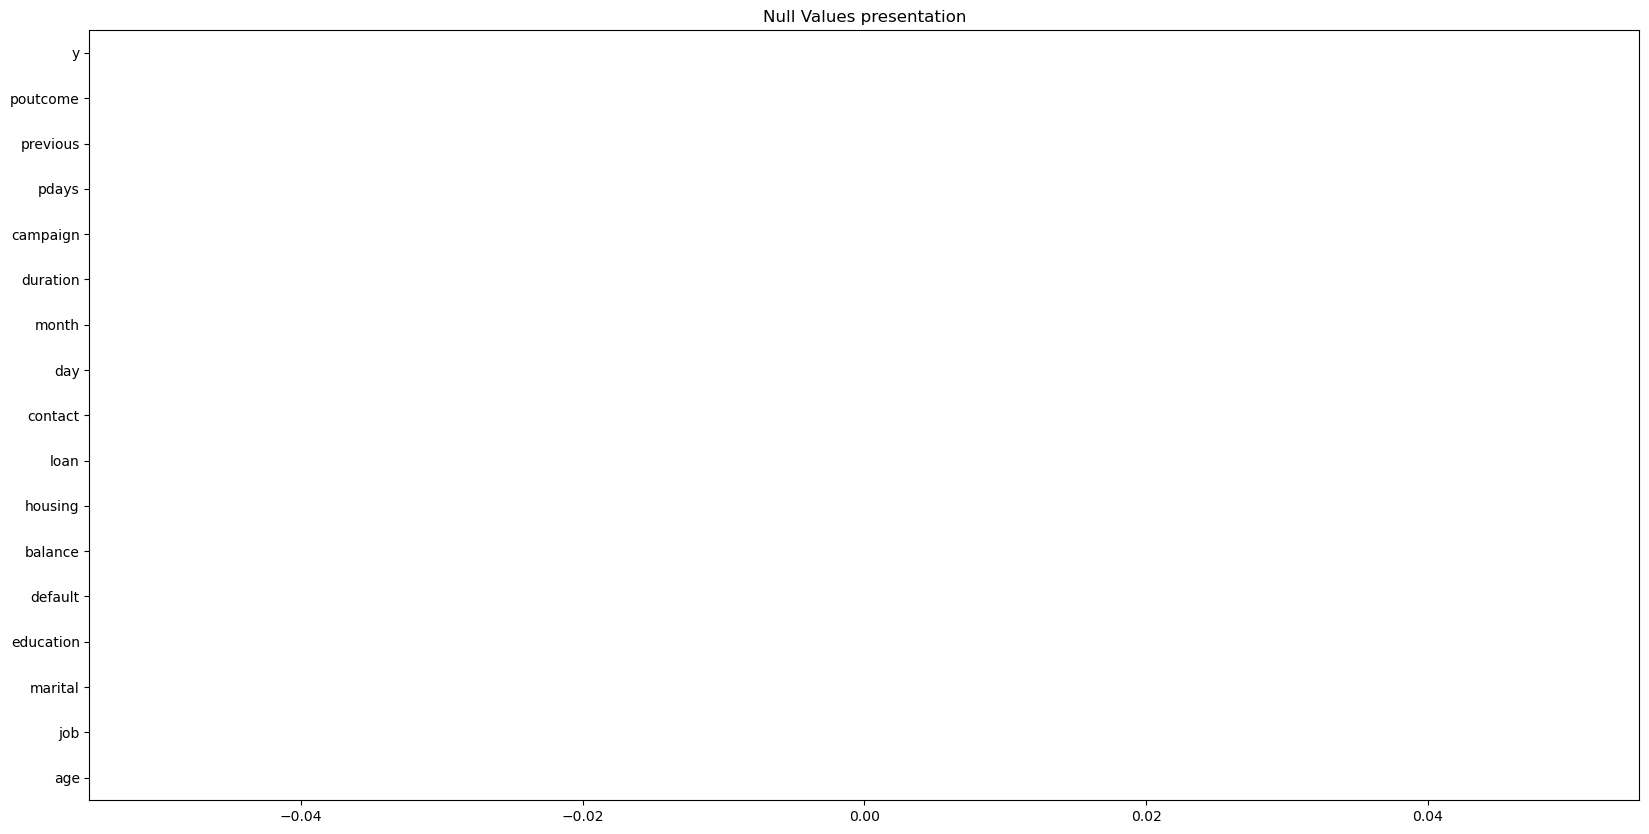

In [5]:
''' Step 4: Checking Null Values present in the dataset'''

plt.figure(figsize=(20,10))
df.isnull().sum().plot(kind = 'barh')
plt.title('Null Values presentation')
plt.show()

In [6]:
''' Step 5: Segregate Categorical and Numerical Columns'''

numerical_col =df.select_dtypes(exclude = 'object')
categorical_col =df.select_dtypes(include = 'object')

In [7]:
''' Step 6: EDA: Exploratory Data Analysis'''

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from collections import OrderedDict

stats = []

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Count':df[i].count(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Minimum':df[i].min(),
        'Maximum':df[i].max(),
        'Range':df[i].max()-df[i].min(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt(),
        'Standard Deviation':df[i].std()  
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report    

,Feature,Count,Mean,Median,Minimum,Maximum,Range,Q1,Q3,IQR,Skewness,Kurtosis,Standard Deviation
0,age,45211,40.936210,39.0,18,95,77,33.0,48.0,15.0,0.684818,0.319570,10.618762
1,balance,45211,1362.272058,448.0,-8019,102127,110146,72.0,1428.0,1356.0,8.360308,140.751547,3044.765829
2,day,45211,15.806419,16.0,1,31,30,8.0,21.0,13.0,0.093079,-1.059897,8.322476
3,duration,45211,258.163080,180.0,0,4918,4918,103.0,319.0,216.0,3.144318,18.153915,257.527812
4,campaign,45211,2.763841,2.0,1,63,62,1.0,3.0,2.0,4.898650,39.249651,3.098021
5,pdays,45211,40.197828,-1.0,-1,871,872,-1.0,-1.0,0.0,2.615715,6.935195,100.128746
6,previous,45211,0.580323,0.0,0,275,275,0.0,0.0,0.0,41.846454,4506.860660,2.303441


In [8]:
''' Data Cleaning'''
df = df.drop(columns =['pdays','previous'],axis =1)

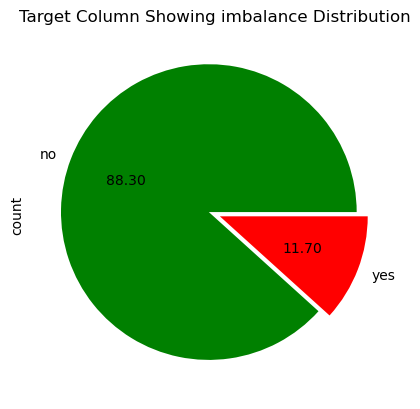

In [9]:
''' Step 7: Checking Target Column'''
''' 
Type of Analysis: Classification Multi Variate Analysis.

In above Dataset, the target column id imbalance in nature.
so hence use imbalance technique to balance the target column
'''

df['y'].value_counts().plot(kind = 'pie',autopct='%1.2f',colors=['green','red'],explode = [0.04,0.04])
plt.title('Target Column Showing imbalance Distribution')
plt.show()

In [10]:

# Step 8: Split the Dataset into X and 

# using Label Encoding
le = LabelEncoder()
for i in categorical_col.columns:
 df[i] = le.fit_transform(df[i])

# Independent Column
X = df.drop(columns = 'y',axis =1)

# Target Column
y =df['y']

# Step 9: use train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [11]:
# Step 10: Using Imbalance technique in order to balance target column

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)

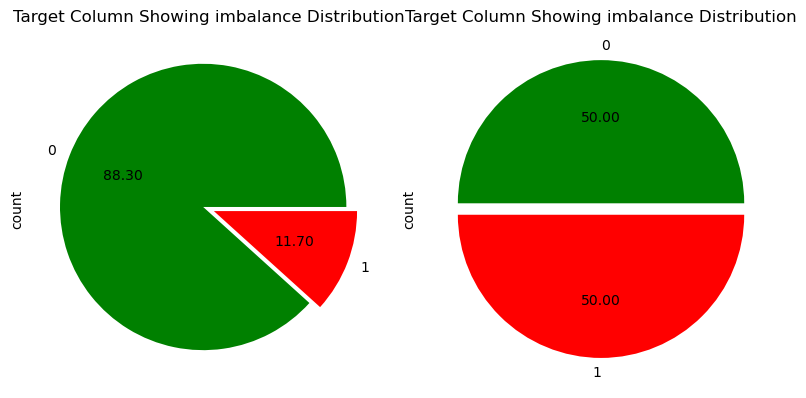

In [12]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
df['y'].value_counts().plot(kind = 'pie',autopct='%1.2f',colors=['green','red'],explode = [0.04,0.04])
plt.title('Target Column Showing imbalance Distribution')


plt.subplot(1,2,2)
y_train.value_counts().plot(kind = 'pie',autopct='%1.2f',colors=['green','red'],explode = [0.04,0.04])
plt.title('Target Column Showing imbalance Distribution')



plt.tight_layout()
plt.show()

In [13]:
# Step 11: Using Scaling Technique

sc = RobustScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)